In [3]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

In [4]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

# Vectors and Geometry

Numericals or symbols

In [5]:
a = np.array([1, 2, 3])
b = np.array([7, 8, 9])
u = smp.Matrix([u1, u2, u3]) # symbolic expressions
v = smp.Matrix([v1, v2, v3])

In [6]:
2*a+b

array([ 9, 12, 15])

In [7]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

## Dot products

In [8]:
np.dot(a, b)

50

In [9]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

## Cross Products

In [10]:
np.cross(a, b)


array([-6, 12, -6])

In [11]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

## Length of vector

In [12]:
np.linalg.norm(a)

3.7416573867739413

In [13]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

## Vector Projection
$$proj_v(u) = \frac{\vec{u} \cdot \vec{v}}{|\vec{v}|} \hat{v}$$

In [14]:
proj_b_a = (np.dot(b, a)/(np.linalg.norm(a)**2))*a
proj_b_a

array([ 3.57142857,  7.14285714, 10.71428571])

In [15]:
proj_v_u = u.dot(v)/u.norm()**2 * u
proj_v_u

Matrix([
[u_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)],
[u_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)],
[u_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)]])

## Lines/Planes in Space

All a line in vector form needs is a starting point and a parallel vector

$$\vec{r} = \vec{r}_0 + \lambda \vec{v}$$

In [16]:
r0 = smp.Matrix([1, 1, 1])
v = smp.Matrix([1, 3, -1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

All a plane in vector form needs is a point and normal vector

$$\vec{n} \cdot (P_0 - \langle x, y, z \rangle) = 0$$

In [17]:
n = smp.Matrix([2, 3, 1])
r0 = smp.Matrix([x, y, z])
P0 = smp.Matrix([2, 2, 2])
n.dot(P0 - r0)

-2*x - 3*y - z + 12

__Example__ Find vector parallel to the line of intersection of the two planes $3x-6y-2z=15$ and $2x+y-2z=5$. (It's going to be perpendicular to both normal vectors).

In [18]:
n1 = smp.Matrix([3, -6, -2])
n2 = smp.Matrix([2, 1, -2])
n1.cross(n2)

Matrix([
[14],
[ 2],
[15]])

# Vector Calculus
## Vector Derivatives

In [19]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [20]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

__Example__: Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [21]:
v = smp.Matrix([5, 10*t, 10])
a = smp.Matrix([0, 10, 0])

We know, 
$$\theta = cos^{-1}\bigg(\frac{\vec{v} \cdot \vec{a}}{|\vec{v}||\vec{a}|}\bigg)$$

In [22]:
cos_of_theta = v.dot(a)/(v.norm()*a.norm())
theta = smp.acos(cos_of_theta)
theta

acos(10*t/sqrt(100*Abs(t)**2 + 125))

## Vector Integrals

__NOTE__: Will not add the +C

In [23]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [24]:
smp.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In some cases integral cannot be solved symbolically: must solve definite integrals numerically.

In [25]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

Integrate from $t=0$ to $t=4$

In [26]:
r_num = smp.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

## Arclength
$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2}dt$$

Rare Cases can be done symbolically, Find arclength of $\langle 0, t, t^2 \rangle$ from $t=0$ to $t=1$

In [27]:
r = smp.Matrix([0, t, t**2])
r_d = smp.diff(r, t).norm()
smp.integrate(r_d, (t, 0, 1))

asinh(2)/4 + sqrt(5)/2

In [28]:
r_num = smp.lambdify([t], r_d)
quad(r_num, 0, 1)[0]

1.4789428575445973

In most cases needs to be done numerically. Find arclength of $\langle e^t, sin(t), t^4 \rangle$ from $t=0$ to $t=1$

In [29]:
r = smp.Matrix([smp.exp(t), smp.sin(t), t**4])
r_d = smp.diff(r, t).norm()

In [30]:
r_num = smp.lambdify([t], r_d)
quad(r_num, 0, 1)[0]

2.316977146444862

## Other Ralavent Quantities
If $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element \
$ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2} = | d\vec{r}/dt| = |\vec{v}|$ then the other quantities of importance are

- Unit Tangent vector: $\vec{T} = \frac{d\vec{r}}{dt} \frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}|$
- Curvature: $\kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|}$
- Unit normal vector to Curve: $\vec{N} = \frac{{d\vec{T}}/{dt}}{|{d\vec{T}}/{dt}|}$

__Example__ Find all these for $\vec{r}(t) = \langle acos(t)e^t, bsin(t), ct \rangle$

In [31]:
t, t1, t2, a, b, c = smp.symbols('t t1 t2 a b c', pos=True, real=True)

In [32]:
r = smp.Matrix([a*smp.cos(t)*smp.exp(t), b*smp.sin(t), c*t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

1. To find the arclength

In [33]:
smp.integrate(smp.diff(r, t).norm(), (t, t1, t2)) # s as a function of time

Integral(sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2), (t, t1, t2))

2. To find tangent vector

In [34]:
smp.diff(r, t)/smp.diff(r, t).norm()

Matrix([
[(-a*exp(t)*sin(t) + a*exp(t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
[                            b*cos(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
[                                   c/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)]])

3. To find the curvature
$$\kappa = \frac{a}{v^2}$$
and, we know, $\vec{T} = \vec{v}/|\vec{v}|$
hence we can say
$$\frac{d\vec{T}}{dt} = \frac{\vec{a}}{|\vec{v}|}$$
OR,
$$\bigg|\frac{d\vec{T}}{dt}\bigg| = \frac{{a}}{|\vec{v}|}$$
Hence finally,
$$\kappa = \bigg|\frac{d\vec{T}}{dt}\bigg| \frac{1}{|\vec{v}|}$$

In [35]:
T = (smp.diff(r, t)/smp.diff(r, t).norm())
dTdt = smp.diff(T, t)
dTdt_mag = dTdt.norm()
v_mag = smp.diff(r, t).norm()

In [36]:

kappa = dTdt_mag/v_mag
dTdt_mag/v_mag


sqrt(c**2*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))**2/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**3 + Abs(2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) - (a*exp(t)*sin(t) - a*exp(t)*cos(t))*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))**2 + Abs(b*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2) + b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2))**2)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)

In [37]:
kappa.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

0.00775458595406284

Making continuous plot

In [38]:
kappa_num = smp.lambdify([t,a,b,c], kappa)

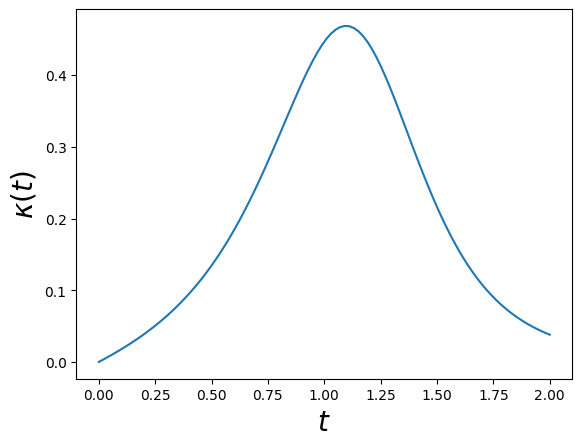

In [39]:
tt = np.linspace(0, 2, 100)
kk = kappa_num(tt, 1, 2, 3)
plt.plot(tt, kk)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$\kappa(t)$', fontsize=20)
plt.show()

4. To find the normal vector

In [40]:
N = dTdt/dTdt_mag

In [41]:
N

Matrix([
[(-2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) + (-a*exp(t)*sin(t) + a*exp(t)*cos(t))*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))/sqrt(c**2*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))**2/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**3 + Abs(2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) - (a*exp(t)*sin(t) - a*exp(t)*cos(t))*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))**2 + Abs(b*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2) + b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2))**2)],
[                 

In [42]:
N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

# Partial/Direcrional Derivatives

In [43]:
x, y, z = smp.symbols('x y z')

## Basics

Partial Derivatives $\partial{f}/\partial{x}$ and $\partial{f}/\partial{y}$ of $f(x, y) = y^2sin(x+y)$

In [44]:
f = (y**2)*(smp.sin(x+y))
f

y**2*sin(x + y)

In [45]:
smp.diff(f, x)

y**2*cos(x + y)

In [46]:
smp.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

## The Chain Rule

In [47]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

- Suppose $x$, $y$, and $z$ are functions of $t$
- $w$ is a function of $x$, $y$, and $z$ i.e. $w$ = $w(x, y, z)$ 

Find $dw/dt$

In [48]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

Can keep things in a more functional form:

In [49]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)


 
 
 
 
 
 
Or put in specific functions:

In [50]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Gradients
Gradients: $\nabla f$. Now we are dealing with particular coordinate system, so we must be careful.

In [51]:
C = CoordSys3D('')

In [52]:
C

In [53]:
f = C.x*smp.sin(C.y)
f

.x*sin(.y)

In [54]:
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [55]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [56]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

## Directional Derivatives
Directional derivatives $D_uf = \nabla f \cdot u$

In [57]:
u = 4*C.i - 3*C.j + 2*C.k
u

4*.i + (-3)*.j + 2*.k

In [58]:
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [59]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

## Extreme Values and Saddle Points

Extreme values of $f(x, y)$ can occur of $f$
- 1.Boundary points of the domain of $f$
- 1.Critical Points $(f_x=f_y=0)$ 

If

- (i) $f_{xx} < 0$ and $f_{xx}f_{yy}-f_{xy}^2>0$ at (a, b) then __local maximum__
- (ii) $f_{xx} > 0$ and $f_{xx}f_{yy}-f_{xy}^2>0$ at (a, b) then __local minimum__
- (iii) $f_{xx}f_{yy}-f_{xy}^2<0$ at (a, b) then __saddle point__
- (iv) $f_{xx}f_{yy}-f_{xy}^2=0$ at (a, b) then __inconclusive__

In [60]:
x, y = smp.symbols('x y', real=True)
f = x**3 + 3*x*y + y**3
f

x**3 + 3*x*y + y**3

In [61]:
smp.solve([smp.diff(f, x), smp.diff(f, y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [62]:
fxx = smp.diff(f, x, x)
fyy = smp.diff(f, y, y)
fxy = smp.diff(f, x, y)

Testing the first point

In [63]:
fxx.subs([(x, -1), (y, -1)])

-6

In [64]:
test = fxx*fyy - fxy**2
test

36*x*y - 9

In [65]:
test.subs([(x, -1), (y, -1)])

27

Thus the first point is a local maximum!

## Lagrange Multiplier
Extremize $f(x, y, z)$ subject to the constraint $g(x,y,z)=0$
- Requires solving the two equations $\nabla f = \lambda \nabla g$ and $g(x, y, z) = 0$

__Example__: A space probe has the shape of an ellipsoid $4x^2+y^2+4z^2=16$ and after sitting in the sun for an hour, the temperature on its surface is given by $T(x, y, z) = 8x^2+4yz-16z+600$. Find the hottest point on the surface

Note that $g=4x^2+y^2+4z^2-16=0$ and $f=T=8x^2+4yz-16z+600$ here

In [66]:
C = CoordSys3D('')

In [67]:
lam = smp.symbols('\lambda')

In [68]:
g = 4*C.x**2 + C.y**2 + 4*C.z**2 - 16
f = 8*C.x**2 + 4*C.y*C.z-16*C.z+600
eq1 = gradient(f) - lam*gradient(g)
eq1 = eq1.to_matrix(C)
eq2 = g
sols = smp.solve([eq1, eq2])
sols
eq1

Matrix([
[   -8*.x*\lambda + 16*.x],
[    -2*.y*\lambda + 4*.z],
[4*.y - 8*.z*\lambda - 16]])

In [69]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


## Multiple Integrals
In rare cases these can be done symbolically

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x dz dy dx$$

In [70]:
x, y, z = smp.symbols('x y z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

But most of the time they need to be done numerically, such as in this example
$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xe^{-y}cos(z)dzdydx$$

We need scipy to solve such function, sympy wont run!!

In [71]:
from scipy.integrate import tplquad
f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f, 0, 1,
        lambda x: 0, lambda x: 1-x**2,
        lambda x, y: 3, lambda x, y: 4-x**2-y**2)[0]

-0.09109526451447894

## Integrals and Vector Fields
### Line Integrals (Scalar)
Given $\vec{r}(t) = \langle g(t), h(t), k(t) \rangle$ the line integral of $f(x, y, z)$ along the curve is 
$$\int_Cf(x, y, z)ds=\int^b_a f(g(t), h(t), k(t))|d\vec{r}/dt|dt$$

In [72]:
t = smp.Symbol('t')
x, y, z, f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x, y, z])
f = f(x, y, z)

In [73]:
integrand = f*smp.diff(r, t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

Suppose
- $\vec{r}(t) = \langle cos(t), sin(t), t \rangle$
- $f(x, y, z) = 2xy + \sqrt z$

and we are gooing from $t=0$ t0 $t=2\pi$.In this case it can be solved symbolically

In [74]:
integrand1 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, t)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 2*smp.pi))

8*pi**(3/2)/3

In general can't be done symbolically. Consider now
- $\vec{r}(t) = \langle 3cos(t), 2sin(t), e^{t/4} \rangle$
- $f(x, y, z) = 2xy + \sqrt z$

and we are going from $t=0$ to $t=2\pi$

In [75]:

integrand2 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, 3*smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, smp.exp(t/4))]).doit().simplify()
# Wont run !!

In [76]:
integrand2

(sqrt(exp(t/4)) + 3*sin(2*t))*sqrt(exp(re(t)/2) + 144*Abs(sin(t))**2 + 16*Abs(cos(t))**2)/4

Do it numerically using scipy quad function

In [77]:
from sympy import lambdify
integrand2_num = lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

21.05530045675979

### Line Integrals (Vector)
Given $\vec{r}(t) = \langle g(t), h(t), k(t) \rangle$ the line integral of $\vec{F}(x, y, z)$ along the curve is
$$\int_C \vec{F}(x, y, z) \cdot d\vec{r} = \int_a^b \vec{F}(g(t), h(t), k(t))\cdot \frac{d\vec{r}}{dt}dt$$

In [78]:
t = smp.symbols('t', real=True)
x, y, z, F1, F2, F3 = smp.symbols('x y z F_1, F_2, F_3', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

In [79]:
integrand = F.dot(smp.diff(r, t))
integrand

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

Now similar to scalar line integrals we can subs the values to check the results

### Surface Integrals (Scalar)
Area of a surface parameterized by $\vec{r}(u,v)$ is given by
$$A = \iint_S \bigg| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \bigg| dudv$$
The surface integral of a scalar function $G(\vec{r})$ is given by
$$\iint_S G(\vec{r}(u, v))\bigg|\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \bigg| dudv$$

2D parabola: $\vec{r}(x, y) = \langle x, y, x^2+y^2 \rangle$ and thus $\vec{r}(\rho, \theta) = \langle \rho cos\theta, \rho sin\theta, \rho^2 \rangle$. Suppose the surface density is given by $G(x, y, z) = x^2+y^2$. Find the surface integral for $0<\rho<1$ and $0<\theta<2\pi$

In [80]:
rho, the = smp.symbols(r'\rho \theta', pos=True, real=True)
x, y, z, G = smp.symbols('x y z G', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G = G(x, y, z)
r = smp.Matrix([x, y, z])

In [81]:
integrand = G*smp.diff(r, rho).cross(smp.diff(r, the)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [82]:
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [83]:
smp.integrate(integrand1, (the, 0, 2*smp.pi), (rho, 0, 1))

pi/60 + 5*sqrt(5)*pi/12

As before, if this integral can't be done symbolically, we need to use scipy to convert to numerical function

### Surface Integrals (Vector)
The surface integral of a vector function $\vec{G}(\vec{r})$ is given by
$$\iint_S \vec{G}(\vec{r}(u, v))\cdot \bigg(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \bigg) dudv$$
This is also known as the flux of the vector field $\vec{G}$ through the surface

2D parabola: $\vec{r}(x, y) = \langle x, y, x^2+y^2 \rangle$ and thus $\vec{r}(\rho, \theta) = \langle \rho cos\theta, \rho sin\theta, \rho^2 \rangle$.Suppose a vector field is given by $\vec{G}(x, y, z) = \langle y^2, z, 0 \rangle$. Find the flux of $\vec{G}$ through half the surface for $0 < \rho < 1$ and $0<\theta<\pi$

In [84]:
rho, the = smp.symbols(r'\rho \theta', pos=True, real=True)
x, y, z, G1, G2, G3 = smp.symbols('x y z G_1 G_2 G_3', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x, y, z)
G2 = G2(x, y, z)
G3 = G3(x, y, z)
r = smp.Matrix([x, y, z])
G = smp.Matrix([G1, G2, G3])

In [85]:
integrand = G.dot(smp.diff(r, rho).cross(smp.diff(r, the)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [86]:
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [87]:
smp.integrate(integrand1, (the, 0, smp.pi), (rho, 0, 1))

-4/5

Again, if this could not be done symbolically, one would need to convert the integrand into a numpy function and integrate using scipys quad function, like in previous examples.